# Exploratory Data Analysis: US Transportation
## Authors: Yasmine Thandi, Kyle Truong, Bin Xu
**Original Dataset Source: Monthly Transportation Statistics (Updated 2024). Kaggle Data Science Platform. https://www.kaggle.com/datasets/utkarshx27/monthly-transportation-statistics/data**

**Modified Dataset: https://raw.githubusercontent.com/HenryCROSS/eecs3401_final_project/main/data/Monthly_Transportation_Statistics.csv**

## Transportation Dataset Description
From the original dataset, any data prior to 1967 was removed, due to there being an insufficient amount of data recorded by The Bureau of Transportation Statistics.

We believe that most of the data provided to us is excessive and isn't required for the task we want to focus on. Therefore we reduced our 136 unique attributes to 26 that we thought were useful for our model.
### Attributes Used:
1. **Date** - The date the data was recorded (Typically the first day of each month at 12:00AM)
1. **Transit Ridership - Other Transit Modes - Adjusted** - Total number of riders on other transit modes.
1. **Transit Ridership - Fixed Route Bus - Adjusted** - Total number of riders on any bus routes.
1. **Transit Ridership - Urban Rail - Adjusted** - Total number of riders on any methods of urban rail (i.e. Subway, Local Trains, etc.)
1. **Freight Rail Intermodal Units** - Number of freight cars used per month.
1. **Freight Rail Carloads** - Number of freight cars with cargo loaded per month.
1. **Highway Vehicle Miles Traveled - All Systems** - Total combined miles travelled on a highway.
1. **Highway Fuel Price - Regular Gasoline** - Price of regular gasoline per gallon.
1. **Highway Fuel Price - On-highway Diesel** - Price of diesel per gallon.
1. **Personal Spending on Transportation - Transportation Services - Seasonally Adjusted** - Average monthly cost on transportation.
1. **Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted** - Average monthly on gasoline, diesel or electricity.
1. **Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted** - Average monthly spending on autoshops, repair parts and services.
1. **Passenger Rail Passengers** - Number of passengers who use the trains every month
1. **Transportation Services Index - Freight** - Month to month performance output measure of freight services
1. **Transportation Services Index - Passenger** - Month to month performance output measure of passenger services
1. **Real Gross Domestic Product - Seasonally Adjusted** - Monetary value of all transportation services
1. **U.S.-Canada Incoming Person Crossings** - Number of people entering the United States from Canada
1. **U.S.-Canada Incoming Truck Crossings** - Number of trucks entering the United States from Canada
1. **U.S.-Mexico Incoming Person Crossings** - Number of people entering the United States from Mexico
1. **U.S.-Mexico Incoming Truck Crossings** - Number of trucks entering the United States from Mexico
1. **U.S. Airline Traffic - Domestic - Non Seasonally Adjusted** - Amount of airline traffic travelling within the United States
1. **U.S. Airline Traffic - Total - Non Seasonally Adjusted** - Amount of airline traffic travelling collectively involving the United States
1. **U.S. Airline Traffic - International - Non Seasonally Adjusted** - Amount of airline traffic travelling in and out of the United States
1. **Transborder - Total North American Freight** - Total freight travelled across North America
1. **Transborder - U.S. - Mexico Freight** - Total freight travelled across the US-Mexico border into the United States
1. **Transborder - U.S. - Canada Freight** - Total freight travelled across the US-Canada border into the United States





# 1- Look at the big picture

### Frame the problem
1. Supervised learning.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No need to continuously adjust any incoming data because the last data recorded was in December, 2023

### Look at the big picture
Predictions will be used to inform operators in the US about future transportation metrics by using previous data on border crossings, ridership count, freight values, prices and revenue. We will be predicting the future cost of transportation and the future size of ridership. This will help with resource allocation, and predicting the future demand of transportation services for the operators. By understanding the relationship between the demand and revenue in the data set, we will provide a suitable budget as a future reference to operators to assist with optimizing pricing strategies for transportation services. 

In [443]:
# Import libraries
# you can install missing library using pip install numpy 

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the data

In [444]:
url = "https://raw.githubusercontent.com/HenryCROSS/eecs3401_final_project/main/data/Monthly_Transportation_Statistics.csv"
data = pd.read_csv(url, sep=',')
data_bak = data

In [445]:
data

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,08/01/2023 12:00:00 AM,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,544000.0,NaN,12196000.0,NaN,3099000.0,NaN,NaN,NaN,0.8,NaN
920,920,09/01/2023 12:00:00 AM,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,501000.0,NaN,12438000.0,NaN,3220000.0,NaN,NaN,NaN,0.8,NaN
921,921,10/01/2023 12:00:00 AM,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,451000.0,NaN,12408000.0,NaN,3038000.0,NaN,NaN,NaN,NaN,NaN
922,922,11/01/2023 12:00:00 AM,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,478000.0,NaN,12329000.0,NaN,2991000.0,NaN,NaN,NaN,NaN,NaN


## Task 2.1
We decided at this point in time to reduce the number of attributes in our dataset, as we believe it would help optimize our workflow moving forwards. As mentioned above, these points of data were selected because we believe that they would be useful to our algorithm.

In [446]:
tokeep = ["Date", "Transit Ridership - Other Transit Modes - Adjusted", "Transit Ridership - Fixed Route Bus - Adjusted", "Transit Ridership - Urban Rail - Adjusted", "Freight Rail Intermodal Units", "Freight Rail Carloads",  "Highway Fuel Price - Regular Gasoline", 
          "Highway Fuel Price - On-highway Diesel", "Personal Spending on Transportation - Transportation Services - Seasonally Adjusted", "Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted", "Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted",
          "Passenger Rail Passengers", "Transportation Services Index - Freight", "Transportation Services Index - Passenger", "Real Gross Domestic Product - Seasonally Adjusted", "U.S.-Canada Incoming Person Crossings", "U.S.-Canada Incoming Truck Crossings", "U.S.-Mexico Incoming Person Crossings", 
          "U.S.-Mexico Incoming Truck Crossings", "U.S. Airline Traffic - Domestic - Non Seasonally Adjusted", "U.S. Airline Traffic - Total - Non Seasonally Adjusted", "U.S. Airline Traffic - International - Non Seasonally Adjusted", "Transborder - Total North American Freight", "Transborder - U.S. - Mexico Freight","Transborder - U.S. - Canada Freight"]
data = data[tokeep]
data.dropna(axis=0, inplace=True)

C:\Users\zerop\AppData\Local\Temp\ipykernel_41412\2912654962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace=True)


In [447]:
data

,Date,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,Freight Rail Intermodal Units,Freight Rail Carloads,Highway Fuel Price - Regular Gasoline,Highway Fuel Price - On-highway Diesel,Personal Spending on Transportation - Transportation Services - Seasonally Adjusted,Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted,...,U.S.-Canada Incoming Person Crossings,U.S.-Canada Incoming Truck Crossings,U.S.-Mexico Incoming Person Crossings,U.S.-Mexico Incoming Truck Crossings,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,U.S. Airline Traffic - Total - Non Seasonally Adjusted,U.S. Airline Traffic - International - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,Transborder - U.S. - Canada Freight
840,01/01/2017 12:00:00 AM,15695383.0,379032287.0,385406234.0,999980.0,990999.0,2.349,2.580,4.200610e+11,3.209980e+11,...,13537.0,483159.0,3424417.0,482882.0,61280000.0,70190000.0,8910000.0,8.796038e+10,4.301536e+10,4.494503e+10
843,04/01/2017 12:00:00 AM,17044306.0,388066756.0,407072908.0,1291296.0,1275287.0,2.417,2.583,4.236060e+11,3.260000e+11,...,25111.0,477189.0,3581996.0,483439.0,61210000.0,70350000.0,9150000.0,9.106762e+10,4.402126e+10,4.704636e+10
846,07/01/2017 12:00:00 AM,19283551.0,361210003.0,388539014.0,1306811.0,1282053.0,2.300,2.496,4.339790e+11,3.250330e+11,...,73810.0,461295.0,3501740.0,481582.0,62060000.0,71140000.0,9080000.0,8.917499e+10,4.439905e+10,4.477594e+10
849,10/01/2017 12:00:00 AM,18699035.0,425403015.0,444700375.0,1385368.0,1325439.0,2.505,2.794,4.399730e+11,3.239000e+11,...,57404.0,505480.0,3749935.0,536285.0,62990000.0,72010000.0,9020000.0,1.005614e+11,5.083515e+10,4.972629e+10
852,01/01/2018 12:00:00 AM,16028440.0,369920847.0,381378921.0,1310160.0,1217433.0,2.555,3.018,4.507730e+11,3.229720e+11,...,12571.0,475119.0,3731985.0,517144.0,55830000.0,64430000.0,8600000.0,9.664831e+10,4.774127e+10,4.890704e+10
855,04/01/2018 12:00:00 AM,17566326.0,392252372.0,398115089.0,1099000.0,1051026.0,2.757,3.096,4.484870e+11,3.240820e+11,...,22471.0,501741.0,3860744.0,542965.0,64560000.0,73630000.0,9070000.0,1.026997e+11,5.051882e+10,5.218090e+10
858,07/01/2018 12:00:00 AM,20067600.0,362119816.0,394287833.0,1399211.0,1328506.0,2.849,3.233,4.447580e+11,3.229340e+11,...,80348.0,482545.0,3916503.0,514241.0,72540000.0,83960000.0,11420000.0,1.012118e+11,5.093911e+10,5.027265e+10
861,10/01/2018 12:00:00 AM,19367600.0,437208668.0,443479335.0,1443854.0,1337180.0,2.860,3.365,4.444250e+11,3.221940e+11,...,51076.0,527247.0,3896888.0,568252.0,67080000.0,75510000.0,8420000.0,1.107956e+11,5.658084e+10,5.421476e+10
864,01/01/2019 12:00:00 AM,16515635.0,367851089.0,368022820.0,1316168.0,1238487.0,2.248,2.980,4.515260e+11,3.242520e+11,...,14412.0,467770.0,3894421.0,544903.0,58030000.0,67020000.0,8980000.0,9.562308e+10,4.959533e+10,4.602775e+10
867,04/01/2019 12:00:00 AM,18746430.0,397479345.0,415533810.0,1322588.0,1310228.0,2.798,3.121,4.599240e+11,3.250270e+11,...,31204.0,480477.0,4256803.0,524215.0,66940000.0,76430000.0,9490000.0,1.045488e+11,5.259620e+10,5.195258e+10


Here, we implement the info() function to get a description of our data, and the number of non-null attributes. We have determined that it would be best to remove Highway Vehicle Miles Traveled - All Systems since it only has 50 non-null attributes. This helps us scale our data from 2017 - 2022.

In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 840 to 903
Data columns (total 25 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Date                                                                                         22 non-null     object 
 1   Transit Ridership - Other Transit Modes - Adjusted                                           22 non-null     float64
 2   Transit Ridership - Fixed Route Bus - Adjusted                                               22 non-null     float64
 3   Transit Ridership - Urban Rail - Adjusted                                                    22 non-null     float64
 4   Freight Rail Intermodal Units                                                                22 non-null     float64
 5   Freight Rail Carloads                   

# 3. Explore and visualize the data to gain insights.

We have decided to create custom heading titles to make the following graphs in our data visualization more readable. Here is the key to the following acronyms of the attribute names:

- TR = Transit Ridership, FR = Freight Rail, H = Highway, V = Vehicle, F = Fuel, P = Price, PST = Personal Spending on Transportation, TSI = Transportation Sevices Index, Pass = Passenger, PC = Person Crossings, TC = Truck Crossings, Mex = Mexico, AT = Airline Traffic, TB = Transborder
- AS = All Systems, A = Adjusted, SA = Seasonally Adjusted, NSA = Non Seasonally Adjusted

In [449]:
# Custom headers
custom_headers = [
    "Date",
    "TROtherTransit(A)",
    "TRFixedRouteBus(A)",
    "TRUrbanRail(A)",
    "FRIntermodalUnits",
    "FRCarloads",
    "HFP-RegGas",
    "HFP-HDiesel",
    "PST-TransServ(SA)",
    "PST-EnergyGoods(SA)",
    "PST-AutoServ(SA)",
    "PassRailPass",
    "TSI-Freight",
    "TSI-Pass",
    "RealGDP(SA)",
    "US-CA PC",
    "US-CA TC",
    "US-Mex PC",
    "US-Mex TC",
    "US AT - Domestic(NSA)",
    "US AT - Total(NSA)",
    "US AT - International(NSA)",
    "TB - TotalFreight",
    "TB - US-MexFreight",
    "TB - US-CAFreight"
]

# Load the dataset with custom headers and selected columns
data = pd.read_csv(url, usecols=tokeep)
data.columns = custom_headers


Here we use the describe() method to see a summary of the numerical attributes. This way we can clean our data more efficiently by replacing missing data with median/average values.

In [450]:
data.describe()

,TROtherTransit(A),TRFixedRouteBus(A),TRUrbanRail(A),FRIntermodalUnits,FRCarloads,HFP-RegGas,HFP-HDiesel,PST-TransServ(SA),PST-EnergyGoods(SA),PST-AutoServ(SA),...,US-CA PC,US-CA TC,US-Mex PC,US-Mex TC,US AT - Domestic(NSA),US AT - Total(NSA),US AT - International(NSA),TB - TotalFreight,TB - US-MexFreight,TB - US-CAFreight
count,2.520000e+02,2.520000e+02,2.520000e+02,4.180000e+02,4.180000e+02,347.000000,388.000000,8.700000e+01,8.700000e+01,8.700000e+01,...,318.000000,335.000000,3.350000e+02,335.000000,6.700000e+01,6.700000e+01,6.700000e+01,2.030000e+02,2.030000e+02,2.030000e+02
mean,1.479240e+07,3.964658e+08,3.433674e+08,8.854064e+05,1.268048e+06,2.502715,2.162191,3.840297e+11,3.421180e+11,4.611258e+11,...,42729.393082,501483.149254,3.562096e+06,428533.892537,6.247284e+07,7.257015e+06,5.521582e+07,9.118179e+10,4.188672e+10,4.929506e+10
std,3.016048e+06,8.023240e+07,8.191928e+07,2.518891e+05,2.048881e+05,1.110270,0.934098,4.783771e+10,6.427849e+10,8.052281e+10,...,34099.439817,58618.974341,6.105487e+05,90815.299348,2.030572e+07,3.087197e+06,1.736053e+07,1.692174e+10,1.074877e+10,7.156351e+09
min,4.303718e+06,1.110446e+08,4.295134e+07,4.076090e+05,7.397330e+05,0.959000,0.921000,2.873200e+11,2.454140e+11,3.241630e+11,...,555.000000,316002.000000,9.168010e+05,241608.000000,3.010000e+06,1.400000e+05,2.880000e+06,5.426452e+10,2.164871e+10,2.976629e+10
25%,1.264651e+07,3.921185e+08,2.998691e+08,6.801630e+05,1.137315e+06,1.420500,1.223250,3.472350e+11,3.024230e+11,4.093830e+11,...,19602.750000,460903.000000,3.282252e+06,362223.500000,5.822000e+07,5.545000e+06,5.332500e+07,8.034844e+10,3.254186e+10,4.554671e+10
50%,1.520069e+07,4.183203e+08,3.722867e+08,9.025320e+05,1.260416e+06,2.519000,2.180000,3.654330e+11,3.167700e+11,4.392800e+11,...,33469.000000,493212.000000,3.592350e+06,408367.000000,7.034000e+07,8.600000e+06,6.128000e+07,9.227839e+10,4.301536e+10,4.890704e+10
75%,1.700526e+07,4.428878e+08,4.011837e+08,1.065960e+06,1.385619e+06,3.238000,2.848250,4.210860e+11,3.250300e+11,5.316650e+11,...,55661.500000,536325.500000,3.919972e+06,486059.000000,7.464000e+07,9.125000e+06,6.669000e+07,9.995265e+10,4.859893e+10,5.308561e+10
max,2.069144e+07,5.155401e+08,4.547436e+08,1.443854e+06,1.704628e+06,5.754000,4.929000,4.724910e+11,4.632940e+11,6.640460e+11,...,215313.000000,636750.000000,4.999418e+06,672503.000000,8.696000e+07,1.167000e+07,7.528000e+07,1.418502e+11,7.029840e+10,7.334734e+10


## 3.1 Plot a histogram of the data using hist()

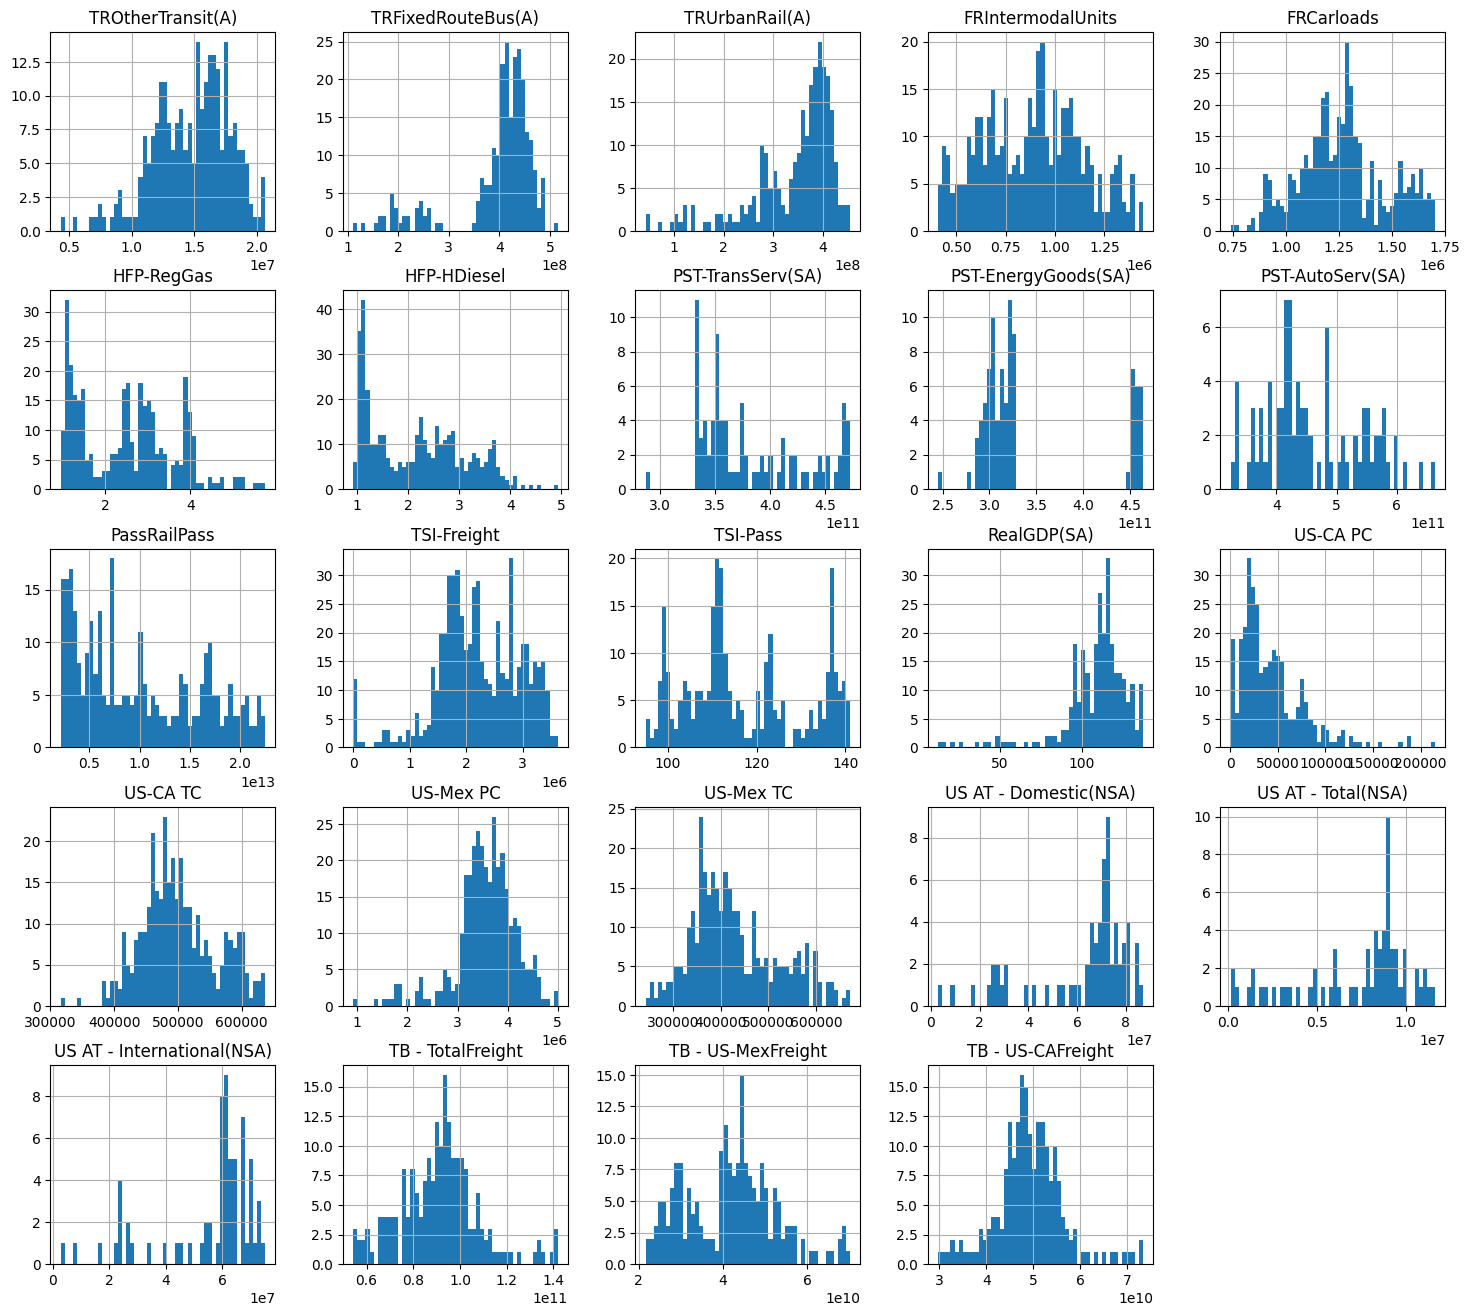

In [451]:
data.hist(bins=50, figsize=(18, 16))

plt.show()

## Histogram on combined target values

We will create a histogram on our target value, which is transit ridership, by combining the data from TROtherTransit(A), TRFixedRouteBus(A) and TRUrbanRail(A). This is done so that we can use the graph to interpret what method of feature scaling we would like to use. Looking at the graph, the data seems to be skewed to the left. However, to be completely sure regarding whether we should use the min-max scaler or not, we want to determine whether there is normalization here.

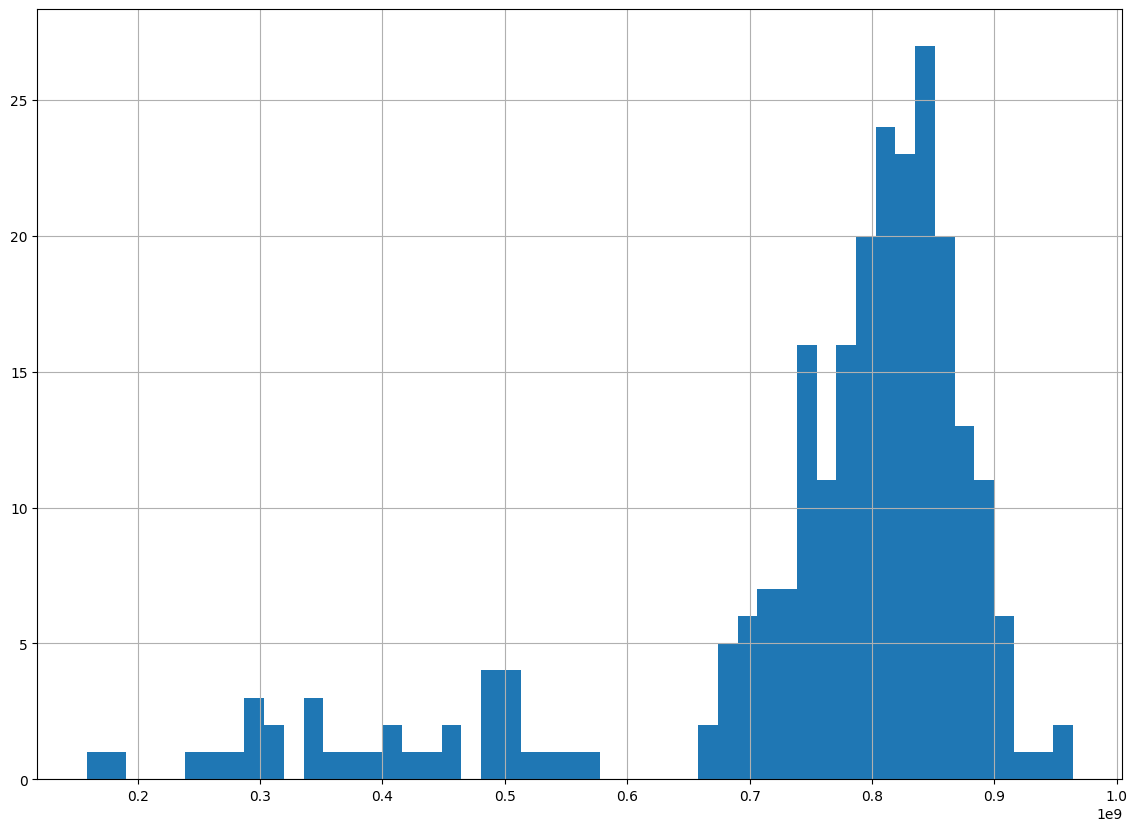

In [452]:
data['TRTotal'] = data['TROtherTransit(A)']+data['TRFixedRouteBus(A)']+data['TRUrbanRail(A)']

data['TRTotal'].hist(bins=50, figsize=(14, 10))

plt.show()

In [453]:
# Data obtained from data['TRTotal']
TotalTRData = data['TRTotal']

# Convert the data to a numpy array and sort the array
TotalTRData = np.array(TotalTRData)

TotalTRData_sorted = np.sort(TotalTRData)

# Create sample data and sort it
new_data = np.random.normal(loc=0, scale=1, size=len(TotalTRData))

new_data_sorted = np.sort(new_data)

We will create a Q-Q plot to determine whether the following data is an example of normal distributon. The data below does slightly follow a line, so we will try to use both feature scaling methods (min-max and a standard scaler) to see which works best in our pipeline.

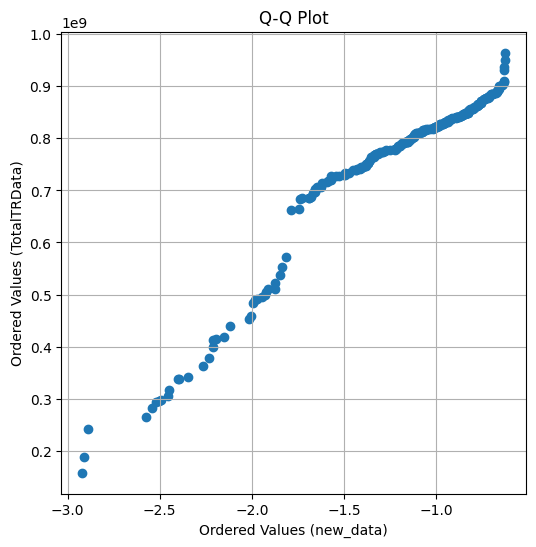

In [454]:
# Plot the Q-Q plot
plt.figure(figsize=(6, 6))
plt.scatter(new_data_sorted, TotalTRData_sorted)
plt.plot([np.min(new_data_sorted), np.max(new_data_sorted)],
         [np.min(TotalTRData_sorted), np.max(TotalTRData_sorted)], color='red')
plt.title('Q-Q Plot')
plt.xlabel('Ordered Values (new_data)')
plt.ylabel('Ordered Values (TotalTRData)')
plt.grid(True)

plt.show()

## 3.2 Plot a Box Plot of the data using boxplot() of Highway Fuel Prices

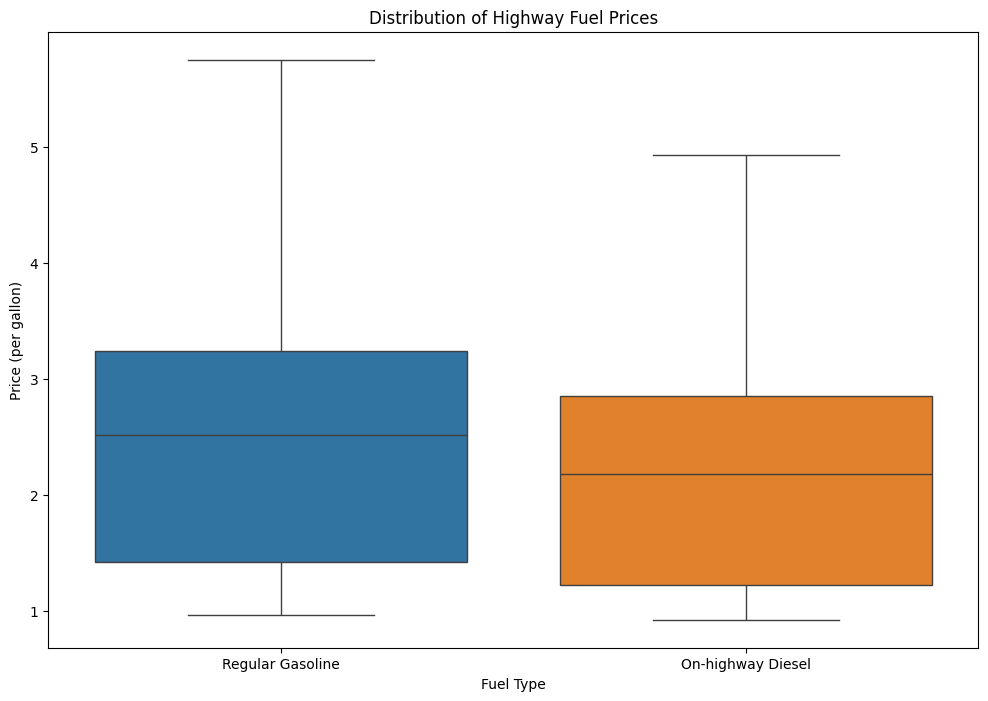

In [455]:
# Boxplot of Highway Fuel Prices 
# Compares the distribution of regular gasoline against highway diesel prices so that operators can make informed decisions regarding budgeting 
# and pricing on transportation services after examining the interquartile range (the spread of the prices)
plt.figure(figsize=(12, 8))  
sns.boxplot(data=data[['HFP-RegGas', 'HFP-HDiesel']])
plt.title('Distribution of Highway Fuel Prices')
plt.ylabel('Price (per gallon)')
plt.xlabel('Fuel Type')
plt.xticks(ticks=[0, 1], labels=['Regular Gasoline', 'On-highway Diesel'])

plt.show()

## 3.3 Plot a histogram of the data using hist() of Personal Spendings on Transportation

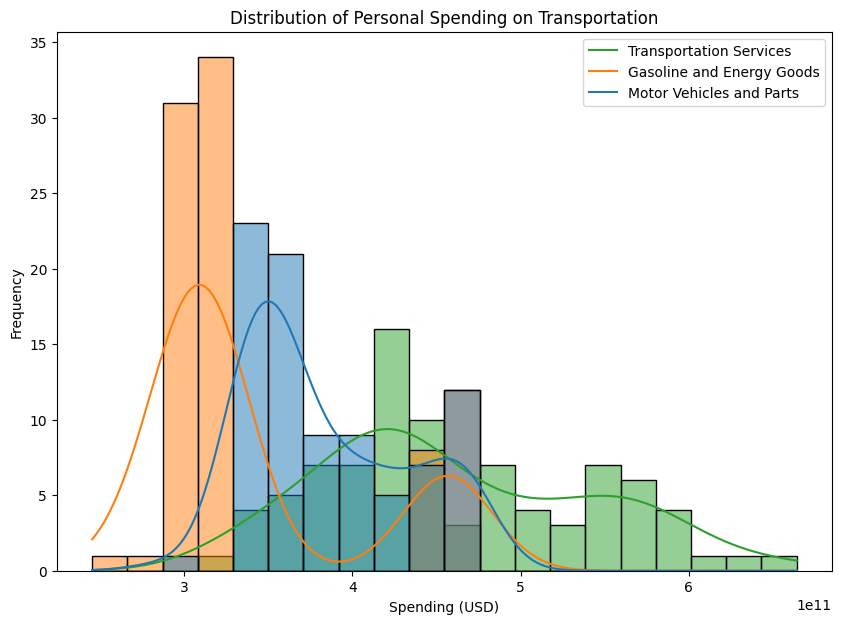

In [456]:
# Histogram of Personal Spendings on Transportation
# Examines personal spending on transportation services, motor vehicles and gas so that operators can make informed decisions regarding 
# budgeting and pricing on transportation and adjust prices accprding to individual and customer expenditures

plt.figure(figsize=(10, 7))
sns.histplot(data=data[['PST-TransServ(SA)',
                        'PST-EnergyGoods(SA)',
                        'PST-AutoServ(SA)']], bins=20, kde=True)
plt.title('Distribution of Personal Spending on Transportation')
plt.xlabel('Spending (USD)')
plt.ylabel('Frequency')
plt.legend(['Transportation Services', 'Gasoline and Energy Goods', 'Motor Vehicles and Parts'])

plt.show()


## 3.4 Plot a Time Series Analysis of Transit Ridership (INCOMPLETE)

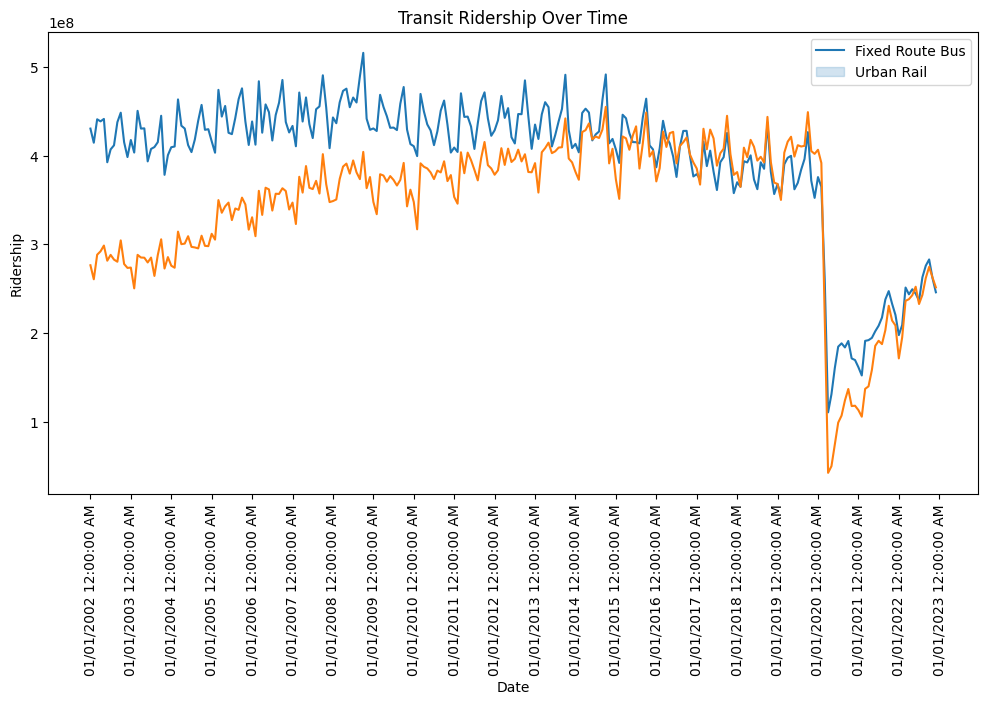

In [457]:
# Plot a Time Series Analysis of Transit Ridership : Plots the trend of transit overtime

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='TRFixedRouteBus(A)', data=data)
sns.lineplot(x='Date', y='TRUrbanRail(A)', data=data)
plt.title('Transit Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.legend(['Fixed Route Bus', 'Urban Rail'])
plt.xticks(range(660,len(data), 12), rotation=90) #how to change initial range?

plt.show()

## 3.5 Plot a Heat Map Using heatmap() to Compare GDP with Different Transportation Metrics

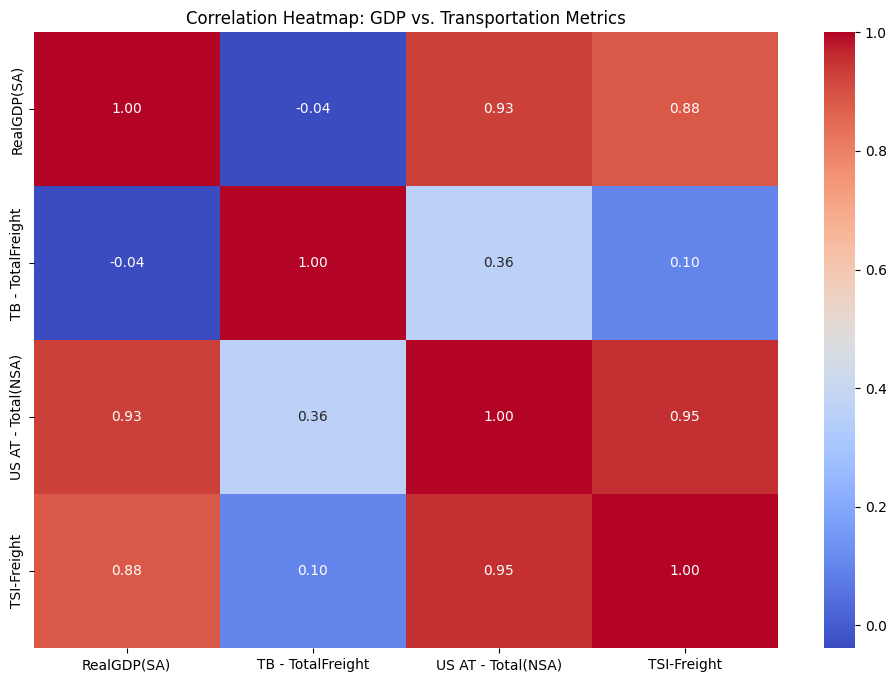

In [458]:
# Heatmap for GDP vs. Transportation Metrics 
# Assists with determining which transportation metrics are strongly correlated with the GDP and help operators make adjustmets to transportation service plans
selected_columns = ['RealGDP(SA)',
                   'TB - TotalFreight',
                   'US AT - Total(NSA)',
                   'TSI-Freight']

correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: GDP vs. Transportation Metrics')

plt.show()


## Look for correlations between the features

## 3.6 Check for correlation between attributes using sns.pairplot.

In [459]:
#Check for correlation between attributes using sns.pairplot.
#sns.pairplot(data)

## 3.7 Look for correlations using pearson correlation coefficient 

In [460]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,TROtherTransit(A),TRFixedRouteBus(A),TRUrbanRail(A),FRIntermodalUnits,FRCarloads,HFP-RegGas,HFP-HDiesel,PST-TransServ(SA),PST-EnergyGoods(SA),PST-AutoServ(SA),...,US-CA TC,US-Mex PC,US-Mex TC,US AT - Domestic(NSA),US AT - Total(NSA),US AT - International(NSA),TB - TotalFreight,TB - US-MexFreight,TB - US-CAFreight,TRTotal
TROtherTransit(A),1.000000,0.550913,0.902099,0.244043,0.013917,0.304182,0.352420,0.384354,-0.349738,-0.151459,...,-0.085412,0.333554,0.095317,0.861873,0.905738,0.847033,0.065299,0.037537,0.098026,0.775862
TRFixedRouteBus(A),0.550913,1.000000,0.798730,-0.304252,0.539669,-0.139652,-0.045056,-0.312468,0.247146,-0.722320,...,0.404058,0.696859,-0.640824,0.775611,0.831212,0.759382,-0.441392,-0.553673,-0.212092,0.943755
TRUrbanRail(A),0.902099,0.798730,1.000000,0.065390,0.221595,0.179952,0.233511,0.172995,-0.161712,-0.388182,...,0.061460,0.557889,-0.194649,0.830878,0.883148,0.814804,-0.163964,-0.230624,-0.041310,0.952715
FRIntermodalUnits,0.244043,-0.304252,0.065390,1.000000,-0.040067,0.648425,0.708596,0.511917,-0.257432,0.444207,...,-0.247783,-0.234056,0.684157,0.122960,0.061463,0.132788,0.509648,0.543174,0.389260,-0.117345
FRCarloads,0.013917,0.539669,0.221595,-0.040067,1.000000,-0.376799,-0.293625,-0.391888,0.548053,-0.502192,...,0.451472,0.459377,-0.582815,0.464592,0.452245,0.462916,-0.312533,-0.444841,-0.070862,0.393924
HFP-RegGas,0.304182,-0.139652,0.179952,0.648425,-0.376799,1.000000,0.980192,0.433385,-0.638993,0.120516,...,-0.419487,-0.285032,0.655413,0.390310,0.320136,0.399643,0.598989,0.422784,0.781339,0.028534
HFP-HDiesel,0.352420,-0.045056,0.233511,0.708596,-0.293625,0.980192,1.000000,0.356209,-0.602170,0.024406,...,-0.351052,-0.261433,0.609655,0.430242,0.328545,0.444848,0.493891,0.296401,0.722651,0.106191
PST-TransServ(SA),0.384354,-0.312468,0.172995,0.511917,-0.391888,0.433385,0.356209,1.000000,-0.308546,0.755911,...,-0.189057,0.008738,0.836104,0.906150,0.814628,0.913059,0.769069,0.797954,0.612788,-0.062820
PST-EnergyGoods(SA),-0.349738,0.247146,-0.161712,-0.257432,0.548053,-0.638993,-0.602170,-0.308546,1.000000,-0.143184,...,0.743777,0.469375,-0.460698,0.868496,0.783141,0.874702,-0.171096,-0.201496,-0.099909,0.035821
PST-AutoServ(SA),-0.151459,-0.722320,-0.388182,0.444207,-0.502192,0.120516,0.024406,0.755911,-0.143184,1.000000,...,-0.151430,-0.343574,0.861495,-0.204751,-0.340585,-0.178942,0.681901,0.796887,0.407564,-0.576556


Let's look at correlations with regards to our target...

In [461]:
corr_matrix["TROtherTransit(A)"].sort_values(ascending=False)

TROtherTransit(A)             1.000000
TSI-Freight                   0.913483
US AT - Total(NSA)            0.905738
TRUrbanRail(A)                0.902099
US AT - Domestic(NSA)         0.861873
US AT - International(NSA)    0.847033
RealGDP(SA)                   0.842883
TRTotal                       0.775862
TRFixedRouteBus(A)            0.550913
PST-TransServ(SA)             0.384354
HFP-HDiesel                   0.352420
US-Mex PC                     0.333554
HFP-RegGas                    0.304182
FRIntermodalUnits             0.244043
US-CA PC                      0.199065
PassRailPass                  0.156236
TB - US-CAFreight             0.098026
US-Mex TC                     0.095317
TSI-Pass                      0.089963
TB - TotalFreight             0.065299
TB - US-MexFreight            0.037537
FRCarloads                    0.013917
US-CA TC                     -0.085412
PST-AutoServ(SA)             -0.151459
PST-EnergyGoods(SA)          -0.349738
Name: TROtherTransit(A), 

In [462]:
corr_matrix["TRFixedRouteBus(A)"].sort_values(ascending=False)

TRFixedRouteBus(A)            1.000000
TRTotal                       0.943755
US AT - Total(NSA)            0.831212
TRUrbanRail(A)                0.798730
US AT - Domestic(NSA)         0.775611
US AT - International(NSA)    0.759382
RealGDP(SA)                   0.700661
US-Mex PC                     0.696859
TSI-Freight                   0.668729
TROtherTransit(A)             0.550913
FRCarloads                    0.539669
US-CA TC                      0.404058
US-CA PC                      0.346792
PST-EnergyGoods(SA)           0.247146
HFP-HDiesel                  -0.045056
HFP-RegGas                   -0.139652
TB - US-CAFreight            -0.212092
FRIntermodalUnits            -0.304252
PST-TransServ(SA)            -0.312468
TB - TotalFreight            -0.441392
TB - US-MexFreight           -0.553673
US-Mex TC                    -0.640824
PassRailPass                 -0.645423
TSI-Pass                     -0.653351
PST-AutoServ(SA)             -0.722320
Name: TRFixedRouteBus(A),

In [463]:
corr_matrix["TRUrbanRail(A)"].sort_values(ascending=False)

TRUrbanRail(A)                1.000000
TRTotal                       0.952715
RealGDP(SA)                   0.931742
TSI-Freight                   0.907694
TROtherTransit(A)             0.902099
US AT - Total(NSA)            0.883148
US AT - Domestic(NSA)         0.830878
US AT - International(NSA)    0.814804
TRFixedRouteBus(A)            0.798730
US-Mex PC                     0.557889
HFP-HDiesel                   0.233511
FRCarloads                    0.221595
HFP-RegGas                    0.179952
PST-TransServ(SA)             0.172995
US-CA PC                      0.171919
FRIntermodalUnits             0.065390
US-CA TC                      0.061460
TB - US-CAFreight            -0.041310
PassRailPass                 -0.127869
PST-EnergyGoods(SA)          -0.161712
TB - TotalFreight            -0.163964
TSI-Pass                     -0.171269
US-Mex TC                    -0.194649
TB - US-MexFreight           -0.230624
PST-AutoServ(SA)             -0.388182
Name: TRUrbanRail(A), dty

# 4. Prepare the data for Machine Learning Algorithms

## 4.1 Remove duplicate rows.

In [464]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

## 4.2 Handle the missing values

In [465]:
data.isna().sum()

Date                            0
TROtherTransit(A)             672
TRFixedRouteBus(A)            672
TRUrbanRail(A)                672
FRIntermodalUnits             506
FRCarloads                    506
HFP-RegGas                    577
HFP-HDiesel                   536
PST-TransServ(SA)             837
PST-EnergyGoods(SA)           837
PST-AutoServ(SA)              837
PassRailPass                  617
TSI-Freight                   352
TSI-Pass                      638
RealGDP(SA)                   639
US-CA PC                      606
US-CA TC                      589
US-Mex PC                     589
US-Mex TC                     589
US AT - Domestic(NSA)         857
US AT - Total(NSA)            857
US AT - International(NSA)    857
TB - TotalFreight             721
TB - US-MexFreight            721
TB - US-CAFreight             721
TRTotal                       672
dtype: int64

In [466]:
data

,Date,TROtherTransit(A),TRFixedRouteBus(A),TRUrbanRail(A),FRIntermodalUnits,FRCarloads,HFP-RegGas,HFP-HDiesel,PST-TransServ(SA),PST-EnergyGoods(SA),...,US-CA TC,US-Mex PC,US-Mex TC,US AT - Domestic(NSA),US AT - Total(NSA),US AT - International(NSA),TB - TotalFreight,TB - US-MexFreight,TB - US-CAFreight,TRTotal
0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,08/01/2023 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,457659.0,3274435.0,639570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,09/01/2023 12:00:00 AM,NaN,NaN,NaN,1008896.0,921716.0,NaN,NaN,NaN,NaN,...,465113.0,3153940.0,584375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
921,10/01/2023 12:00:00 AM,NaN,NaN,NaN,1075731.0,921591.0,NaN,NaN,NaN,NaN,...,489210.0,3195615.0,633159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
922,11/01/2023 12:00:00 AM,NaN,NaN,NaN,1279906.0,1128573.0,NaN,NaN,NaN,NaN,...,466943.0,3592021.0,608061.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop the date since it is not needed for the training

In [467]:
data.drop(labels=['Date'], axis=1, inplace=True)

## 4.3 Create a pipeline

In [556]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### Pipeline with standard Scaler and replace the empty value to 0

In [557]:
num_cols = data.select_dtypes(include='number').columns.to_list()

num_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler())

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols)],
                                    remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['TROtherTransit(A)', 'TRFixedRouteBus(A)',
                                  'TRUrbanRail(A)', 'FRIntermodalUnits',
                                  'FRCarloads', 'HFP-RegGas', 'HFP-HDiesel',
                                  'PST-TransServ(SA)', 'PST-EnergyGoods(SA)',
                                  'PST-AutoServ(SA)', 'PassRailPass',
                                  'TSI-Freight', 'TSI-Pass', 'RealGDP(SA)',
                                  'US-CA PC', 'US-CA TC', 'US-Mex PC',
                                  'US-Mex TC', 'US AT - Domestic(NSA)',
                                  'US AT - Total(NSA)',
                                  'US AT - International(NSA)',
                                  'TB - TotalFreight', 'TB - US-MexFreight',
                                  'TB - US-CAFreight', 'TRTotal'])])

In [558]:
data_prepared = preprocessing.fit_transform(data)

feature_names=preprocessing.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)
data_prepared.shape

(924, 25)

# 5. Select a model and train it

#### split data

In [559]:
from sklearn.model_selection import train_test_split

features = ["num__TROtherTransit(A)", "num__TRFixedRouteBus(A)", "num__TRUrbanRail(A)"]

y = data_prepared.drop(features, axis=1)
X = data_prepared[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(739, 3) (739, 22) (185, 3) (185, 22)


#### Train a Linear Regression model without any regularization 

In [560]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [561]:
lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

0.47456164289580277

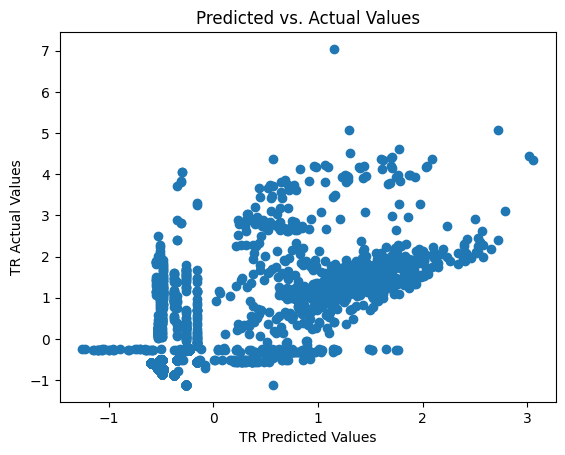

In [562]:
import matplotlib.pyplot as plt

# Assuming 'lr_model' is your best performing trained linear regression model
lr_y_predict = lr_model.predict(X_test)  # X is your feature data
plt.scatter(lr_y_predict, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### Train a Linear Regression model using Ridge regularization with alpha=1

In [563]:
from sklearn.linear_model import Ridge

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)


In [564]:
Ridge_y_predict = ridge_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)

print(f'Ridge Regression MSE: {ridge_mse}')

Ridge Regression MSE: 0.475266416763159


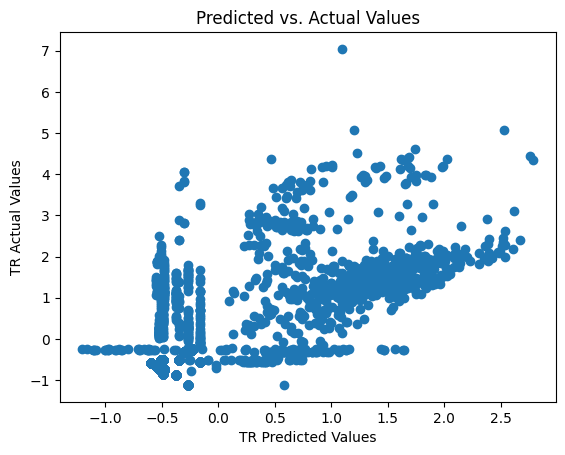

In [565]:
Ridge_y_predict = ridge_model.predict(X_test)
plt.scatter(Ridge_y_predict, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### Train a Linear Regression model using Lasso regularization with alpha=1

In [566]:
from sklearn.linear_model import Lasso

LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)

In [567]:
Lasso_y_predict = lasso_model.predict(X_test)
lasso_mse=mse(y_test, Lasso_y_predict)

print(f'Lasso Regression MSE: {lasso_mse}')

Lasso Regression MSE: 1.0577053457651913


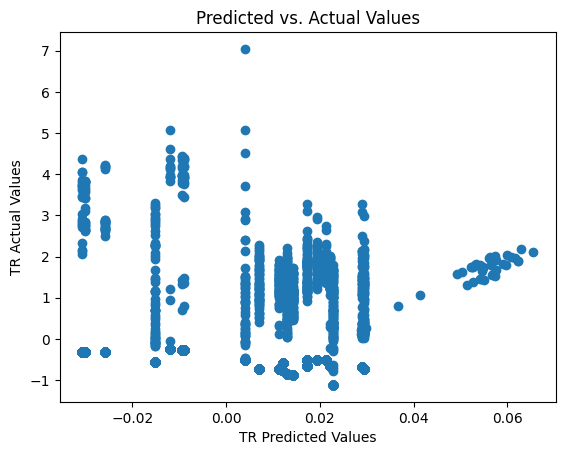

In [568]:
Lasso_y_predict = lasso_model.predict(X_test)
plt.scatter(Lasso_y_predict, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### Decision Tree model

In [569]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
dt_y_pred = decision_tree.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
dt_mse=mse(y_test, dt_y_pred)
dt_mse

0.5439066487561832

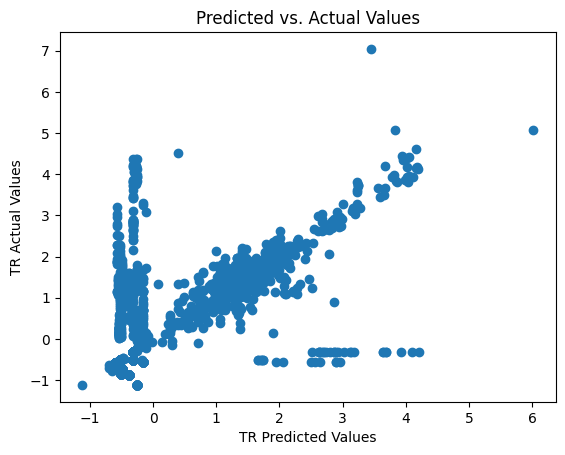

In [570]:
plt.scatter(dt_y_pred, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

### Pipeline with Min Max Scaler and replace the empty value to 0

In [571]:
from sklearn.preprocessing import MinMaxScaler

num_cols = data.select_dtypes(include='number').columns.to_list()

#create pipelines for numeric columns
num_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), MinMaxScaler())

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols)],
                                    remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['TROtherTransit(A)', 'TRFixedRouteBus(A)',
                                  'TRUrbanRail(A)', 'FRIntermodalUnits',
                                  'FRCarloads', 'HFP-RegGas', 'HFP-HDiesel',
                                  'PST-TransServ(SA)', 'PST-EnergyGoods(SA)',
                                  'PST-AutoServ(SA)', 'PassRailPass',
                                  'TSI-Freight', 'TSI-Pass', 'RealGDP(SA)',
                                  'US-CA PC', 'US-CA TC', 'US-Mex PC',
                                  'US-Mex TC', 'US AT - Domestic(NSA)',
                                  'US AT - Total(NSA)',
                                  'US AT - International(NSA)',
                                  'TB - TotalFreight', 'TB - US-MexFreight',
                                  'TB - US-CAFreight', 'TRTotal'])])

In [572]:
data_prepared = preprocessing.fit_transform(data)

feature_names=preprocessing.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)
data_prepared.shape

(924, 25)

In [573]:
from sklearn.model_selection import train_test_split

features = ["num__TROtherTransit(A)", "num__TRFixedRouteBus(A)", "num__TRUrbanRail(A)"]

y = data_prepared.drop(features, axis=1)
X = data_prepared[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(739, 3) (739, 22) (185, 3) (185, 22)


In [574]:
from sklearn.linear_model import LinearRegression

lr_minmax_model = LinearRegression()

lr_minmax_model.fit(X_train,y_train)

LinearRegression()

In [575]:
lr_minmax_y_predict = lr_minmax_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_minmax_mse=mse(y_test, lr_minmax_y_predict)
lr_minmax_mse

0.03456303588033375

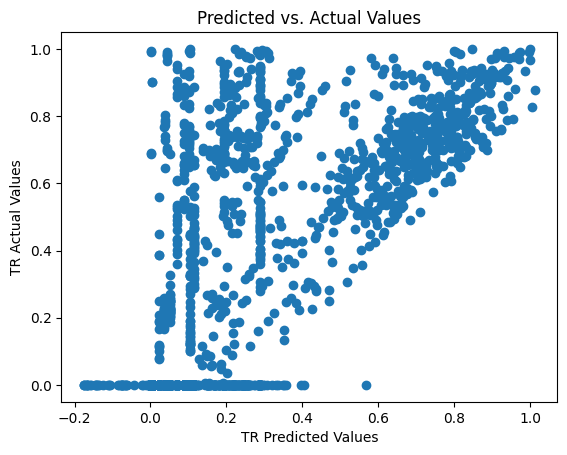

In [576]:
plt.scatter(lr_minmax_y_predict, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### Desicion Tree with min-max scaler

In [577]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
dt_minmax_y_pred = decision_tree.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
dt_minmax_mse=mse(y_test, dt_minmax_y_pred)
dt_minmax_mse

0.03607843108539446

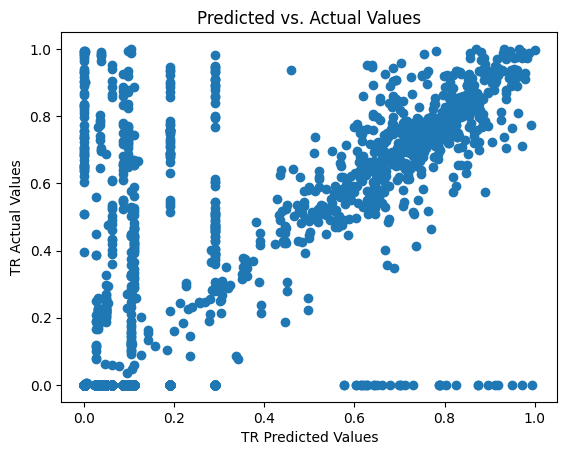

In [578]:
plt.scatter(dt_minmax_y_pred, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### Train a Linear Regression model using Ridge regularization with alpha=1 and MinMax Scaler

In [579]:
from sklearn.linear_model import Ridge

RidgeRegression = Ridge(alpha=1)
ridge_minmax_model = RidgeRegression.fit(X_train, y_train)

In [580]:
Ridge_minmax_y_predict = ridge_minmax_model.predict(X_test)
ridge_minmax_mse = mse(y_test, Ridge_minmax_y_predict)

print(f'Ridge Regression MSE: {ridge_minmax_mse}')

Ridge Regression MSE: 0.03538292990581977


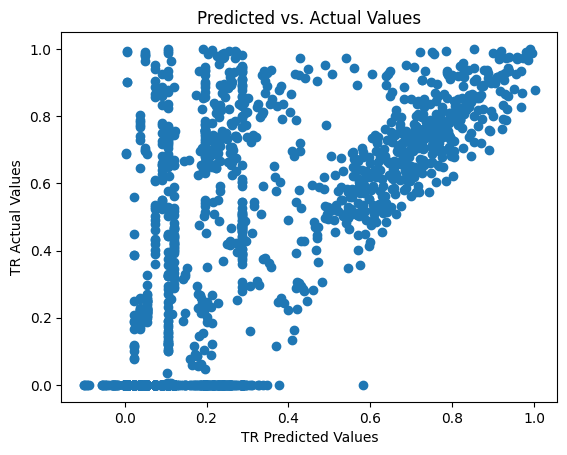

In [581]:
plt.scatter(Ridge_minmax_y_predict, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### Train a Linear Regression model using Lasso regularization with alpha=1 and MinMax Scaler

In [582]:
from sklearn.linear_model import Lasso

LassoRegression = Lasso(alpha=1)
lasso_minmax_model = LassoRegression.fit(X_train, y_train)

In [583]:
Lasso_minmax_y_predict = lasso_minmax_model.predict(X_test)
lasso_minmax_mse=mse(y_test, Lasso_minmax_y_predict)

print(f'Lasso Regression MSE: {lasso_minmax_mse}')

Lasso Regression MSE: 0.08453326586958618


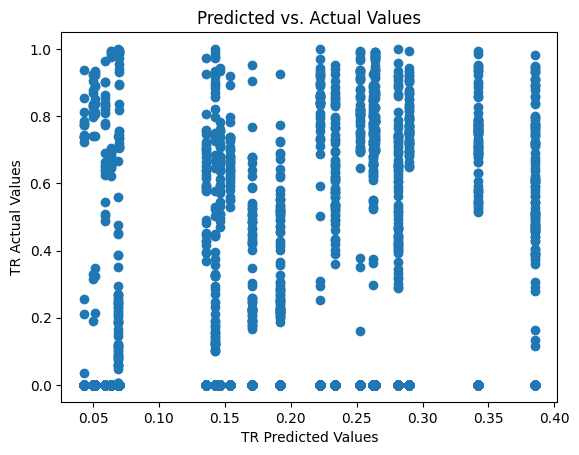

In [584]:
plt.scatter(Lasso_minmax_y_predict, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

## Polynomial Regression

In [585]:
from sklearn.preprocessing import PolynomialFeatures

### Pipeline with standard Scaler, PolynomialFeatures with degree = 3 and replace the empty value to 0

In [586]:
num_cols = data.select_dtypes(include='number').columns.to_list()

#create pipelines for numeric columns
num_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler(),
                             PolynomialFeatures(degree=3))

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols)],
                                    remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=3))]),
                                 ['TROtherTransit(A)', 'TRFixedRouteBus(A)',
                                  'TRUrbanRail(A)', 'FRIntermodalUnits',
                                  'FRCarloads', 'HFP-RegGas', 'HFP-HDiesel',
                                  'PST-TransServ(SA)', 'PST-EnergyGoods(SA)',
                                  'PST-AutoServ(SA)', 'PassRailPass',
                                  'TSI-Freight', 'TSI-Pass', 'RealGDP(SA)',
                                  'US-CA PC', 'US-CA TC', 'US-Mex PC',
                                  'US-Mex TC', 'US AT - Domestic(NSA)',
                                  'US AT - Total(NSA)',
                                  'US AT - International(NSA)',
                                  'TB - TotalFreight', 'TB - US-MexFreight',
                                  'TB - US-CAFreight', 'TRTotal'])])

In [587]:
data_prepared = preprocessing.fit_transform(data)

feature_names=preprocessing.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)
data_prepared.shape

(924, 3276)

In [588]:
from sklearn.model_selection import train_test_split

features = ["num__TROtherTransit(A)", "num__TRFixedRouteBus(A)", "num__TRUrbanRail(A)"]

y = data_prepared.drop(features, axis=1)
X = data_prepared[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(739, 3) (739, 3273) (185, 3) (185, 3273)


In [589]:
from sklearn.linear_model import LinearRegression

pr_model = LinearRegression()

pr_model.fit(X_train,y_train)

LinearRegression()

In [590]:
pr_y_predict = pr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
pr_mse=mse(y_test, pr_y_predict)
pr_mse

8.56286679035866

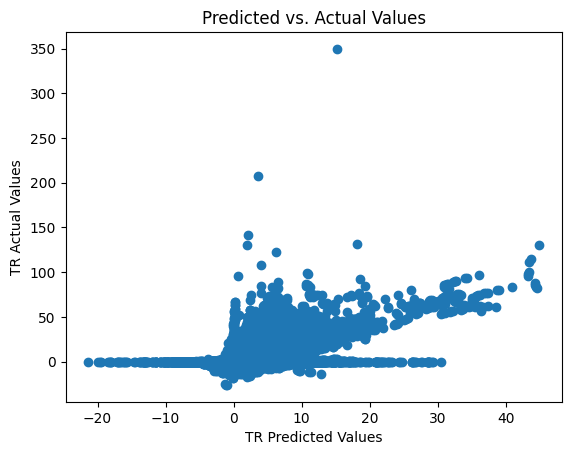

In [591]:
plt.scatter(pr_y_predict, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### decision tree with Polynomial Regression

In [592]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
dt_pr_y_pred = decision_tree.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
dt_pr_mse=mse(y_test, dt_pr_y_pred)
dt_pr_mse

9.429033781814375

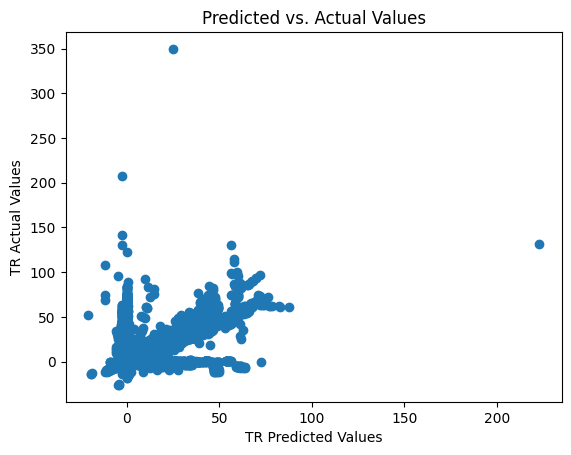

In [593]:
plt.scatter(dt_pr_y_pred, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### Train a Polynomial Regression model using Lasso regularization with alpha=1

In [594]:
from sklearn.linear_model import Lasso

LassoRegression = Lasso(alpha=1)
pr_lasso_model = LassoRegression.fit(X_train, y_train)

c:\Users\zerop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


In [595]:
pr_Lasso_y_predict = pr_lasso_model.predict(X_test)
pr_lasso_mse=mse(y_test, pr_Lasso_y_predict)

print(f'Lasso Regression MSE: {pr_lasso_mse}')

Lasso Regression MSE: 11.746551933125385


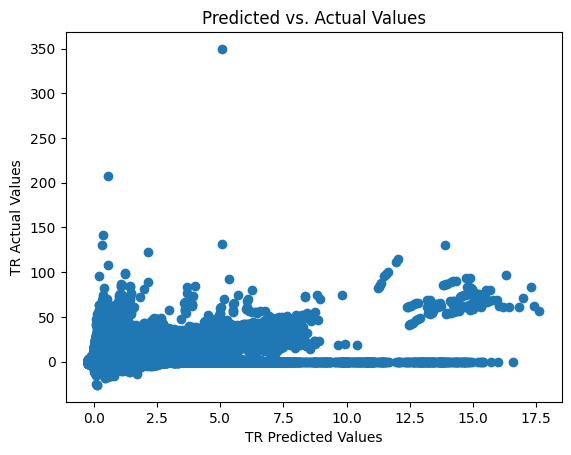

In [596]:
plt.scatter(pr_Lasso_y_predict, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

#### Train a Polynomial Regression model using Ridge regularization with alpha=1

In [597]:
from sklearn.linear_model import Ridge

RidgeRegression = Ridge(alpha=1)
pr_ridge_model = RidgeRegression.fit(X_train, y_train)

In [598]:
pr_Ridge_y_predict = pr_ridge_model.predict(X_test)
pr_ridge_mse = mse(y_test, pr_Ridge_y_predict)

print(f'Ridge Regression MSE: {pr_ridge_mse}')

Ridge Regression MSE: 8.604473131783472


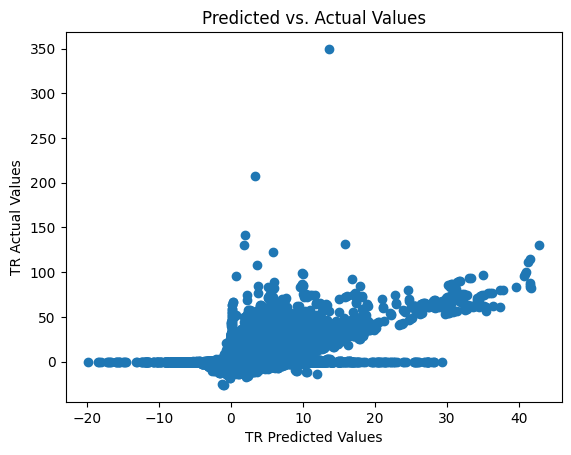

In [599]:
plt.scatter(pr_Ridge_y_predict, y_test)  # y is your actual target values
plt.xlabel("TR Predicted Values")
plt.ylabel("TR Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

In [600]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Decision Tree MSE: {dt_mse}')
print()
print(f'Linear Regression with MinMaxScaler MSE: {lr_minmax_mse}')
print(f'Ridge Regression with MinMaxScaler MSE: {ridge_minmax_mse}')
print(f'Lasso Regression with MinMaxScaler MSE: {lasso_minmax_mse}')
print(f'Decision Tree with MinMaxScaler MSE: {dt_minmax_mse}')
print()
print(f'Polynomail Regression MSE: {pr_mse}')
print(f'Ridge Regression with Polynomail Regression MSE: {pr_ridge_mse}')
print(f'Lasso Regression with Polynomail Regression MSE: {pr_lasso_mse}')
print(f'Decision Tree with Polynomail Regression MSE: {dt_pr_mse}')


Linear Regression MSE: 0.47456164289580277
Ridge Regression MSE: 0.475266416763159
Lasso Regression MSE: 1.0577053457651913
Decision Tree MSE: 0.5439066487561832

Linear Regression with MinMaxScaler MSE: 0.03456303588033375
Ridge Regression with MinMaxScaler MSE: 0.03538292990581977
Lasso Regression with MinMaxScaler MSE: 0.08453326586958618
Decision Tree with MinMaxScaler MSE: 0.03607843108539446

Polynomail Regression MSE: 8.56286679035866
Ridge Regression with Polynomail Regression MSE: 8.604473131783472
Lasso Regression with Polynomail Regression MSE: 11.746551933125385
Decision Tree with Polynomail Regression MSE: 9.429033781814375


# 6. Fine-Tune Your Model